In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Dimensionless radius x = r / r_s
x = np.logspace(-5, 3, 800)

## Inner Profiles

In [75]:
# --- Density profiles ---
def rho_sis(x):
    return 1 / (x**2)

def rho_nfw(x):
    return 1.0 / (x * (1.0 + x)**2)

def rho_hernquist(x):
    return 1.0 / (x * (1.0 + x)**3)

def rho_moore(x):
    return 1.0 / (x**1.5 * (1.0 + x**1.5))

def rho_jaffe(x):
    return 1.0 / (x**2 * (1.0 + x)**2)

def rho_burkert(x):
    return 1.0 / ((1.0 + x) * (1.0 + x**2))

def rho_einasto(x, alpha=0.18):
    return np.exp(-(2.0/alpha) * (x**alpha - 1.0))

profiles = {
    "SIS": rho_sis,
    "NFW": rho_nfw,
    "Hernquist": rho_hernquist,
    "Moore": rho_moore,
    "Jaffe": rho_jaffe,
    "Burkert": rho_burkert,
    "Einasto": lambda x: rho_einasto(x, alpha=0.2),
}

In [76]:
# --- Normalize so all profiles satisfy ρ(r_s) = 1 ---
x_ref = 1.0
rho_norm = {}
for name, func in profiles.items():
    rho_raw = func(x)
    rho_ref = func(x_ref)
    rho_norm[name] = rho_raw / rho_ref


In [77]:

# --- Plot Configurations ---
plt.rcParams.update({
    "text.usetex": True,              # use LaTeX for all text
    "font.serif": ["Computer Modern"],

    # Font sizes (tweak to taste)
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,

    # Tick style
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
})

### NFW and SIS plot (Figure 4.2)

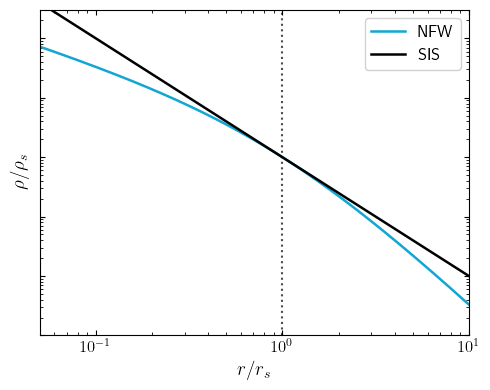

In [78]:


colors = {
    "NFW": "#11A6D3",
    "SIS": "#000000"
}

fig, ax = plt.subplots(figsize=(5, 4))

# Vertical line at r = r_s
ax.axvline(1.0, linestyle=":", color="k", alpha=0.7)
ax.set_xscale("log")
ax.set_yscale("log")
ax.tick_params(axis='y', labelleft=False)
ax.set_xlabel(r"$r / r_s$")
ax.set_ylabel(r"$\rho / \rho_s$")


ax.plot(x, rho_norm["NFW"], label="NFW",
        color=colors["NFW"], linewidth=1.8)

ax.plot(x, rho_norm["SIS"], label="SIS",
        color=colors["SIS"], linewidth=1.8)

ax.set_xlim(0.05, 10)
ax.set_ylim(1e-3, 3e2)

# Legend style similar to your SIS–NFW plot
leg = ax.legend(loc="upper right", frameon=True)
leg.get_frame().set_alpha(0.9)


plt.tight_layout()
plt.show()


### gNFW plot (Figure 4.3)

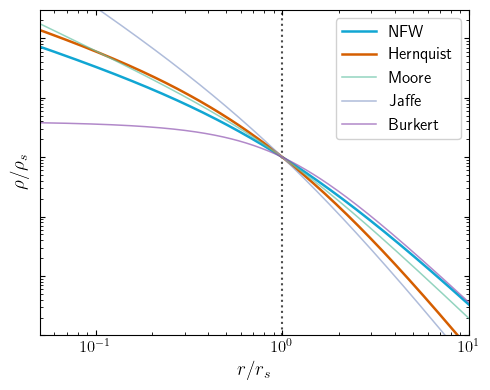

In [79]:
colors = {
    "NFW": "#11A6D3",
    "Hernquist": "#D55E00",
    "Moore":   "#66c2a5",
    "Jaffe":   "#8da0cb",
    "Burkert": "#9157b3"
}

fig, ax = plt.subplots(figsize=(5, 4))

# Vertical line at r = r_s
ax.axvline(1.0, linestyle=":", color="k", alpha=0.7)
ax.set_xscale("log")
ax.set_yscale("log")
ax.tick_params(axis='y', labelleft=False)
ax.set_xlabel(r"$r / r_s$")
ax.set_ylabel(r"$\rho / \rho_s$")


ax.plot(x, rho_norm["NFW"], label="NFW",
        color=colors["NFW"], linewidth=1.8)
ax.plot(x, rho_norm["Hernquist"], label="Hernquist",
        color=colors["Hernquist"], linewidth=1.8)

for name in ["Moore", "Jaffe", "Burkert"]:
    ax.plot(x, rho_norm[name], label=name,
            color=colors[name], linewidth=1.1, alpha=0.7)

ax.set_xlim(0.05, 10)
ax.set_ylim(1e-3, 3e2)

# Legend style similar to your SIS–NFW plot
leg = ax.legend(loc="upper right", frameon=True)
leg.get_frame().set_alpha(0.9)


plt.tight_layout()
plt.show()


### Einasto α variation (Left) and Einasto vs NFW (Right)

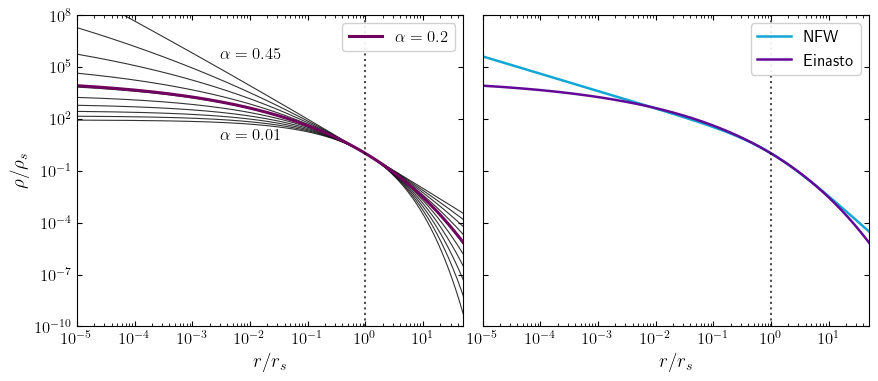

In [80]:
# Left Panel: Einasto with varying alpha

fig, (ax_left, ax_right) = plt.subplots(
    1, 2, figsize=(9.0, 3.8), sharey=True
)

fig.subplots_adjust(left=0.10, right=0.98, bottom=0.15, top=0.97, wspace=0.05)

alphas = np.linspace(0.01, 0.45, 10)   # 10 curves from 0.01 to 0.45
alpha_highlight = 0.20                 # highlighted curve

# Plot all curves in thin black except the highlighted one
for a in alphas:
    if np.isclose(a, alpha_highlight):
        continue
    rho = rho_einasto(x, a)
    ax_left.plot(x, rho, color="black", linewidth=0.8, alpha=0.8)

# Highlighted Einasto
rho_high = rho_einasto(x, alpha_highlight)
ax_left.plot(x, rho_high, color="#70035e", linewidth=2.2,
             label=rf"$\alpha = {alpha_highlight}$")

# Vertical line at r = r_s (x = 1)
ax_left.axvline(1.0, linestyle=":", color="k", alpha=0.7)

# Axes scaling & limits
ax_left.set_xscale("log")
ax_left.set_yscale("log")

ax_left.set_xlim(1e-5, 50)
ax_left.set_ylim(1e-10, 1e8)

# Labels
ax_left.set_xlabel(r"$r / r_s$")
ax_left.set_ylabel(r"$\rho / \rho_s$")

# Annotations for extreme alphas
ax_left.text(3e-3, 3e5, r"$\alpha = 0.45$", fontsize=12)
ax_left.text(3e-3, 7,    r"$\alpha = 0.01$", fontsize=12)

# Legend
leg_left = ax_left.legend(loc="upper right", frameon=True)
leg_left.get_frame().set_alpha(0.9)



# Right Panel: NFW vs Einasto

colors = {
    "NFW": "#11A6D3",
    "Einasto": "#630997",
}

# Plot NFW & Einasto
ax_right.plot(x, rho_norm["NFW"], label="NFW",
              color=colors["NFW"], linewidth=1.8)
ax_right.plot(x, rho_norm["Einasto"], label="Einasto",
              color=colors["Einasto"], linewidth=1.8)

# Vertical line at r = r_s
ax_right.axvline(1.0, linestyle=":", color="k", alpha=0.7)

# Axes scaling & limits (same as left)
ax_right.set_xscale("log")
ax_right.set_yscale("log")

ax_right.set_xlim(1e-5, 50)
ax_right.set_ylim(1e-10, 1e8)

ax_right.set_xlabel(r"$r / r_s$")
ax_right.tick_params(axis='y', labelleft=False)

# Legend
leg_right = ax_right.legend(loc="upper right", frameon=True)
leg_right.get_frame().set_alpha(0.9)

plt.show()


## Outer Profiles

In [81]:
# 1) Mean background density (small constant floor)
rho_mean = np.ones_like(x) * 1e-4

# 2) “Correlation-function” outer term: A * (r/r0)^(-γ)
r0    = 20.0
gamma = 1.8
A_corr = 5e-4   # amplitude – small enough to not affect inner parts

rho_corr = rho_mean + A_corr * (x / r0)**(-gamma)

# 3) Power-law outer term: A_pl / (1/m + (r/r_p)^b)
A_pl = 5e-4
m    = 20.0
r_p  = 30.0
b    = 2.0

rho_power = rho_mean + A_pl / (1.0/m + (x / r_p)**b)

In [82]:
# Total profiles (Einasto + outer terms)

rho_ein = rho_norm["Einasto"]

rho_mean_tot  = rho_ein + rho_mean
rho_corr_tot  = rho_ein + rho_corr
rho_power_tot = rho_ein + rho_power

In [83]:
# logarithmic slope d ln rho / d ln r

def log_slope(x, y):
    return np.gradient(np.log(y), np.log(x))

s_mean   = log_slope(x, rho_mean_tot)
s_corr   = log_slope(x, rho_corr_tot)
s_power  = log_slope(x, rho_power_tot)
s_einasto = log_slope(x, rho_ein)

### Einasto plus outer profiles, density (Left) and Log Derivative (Right)

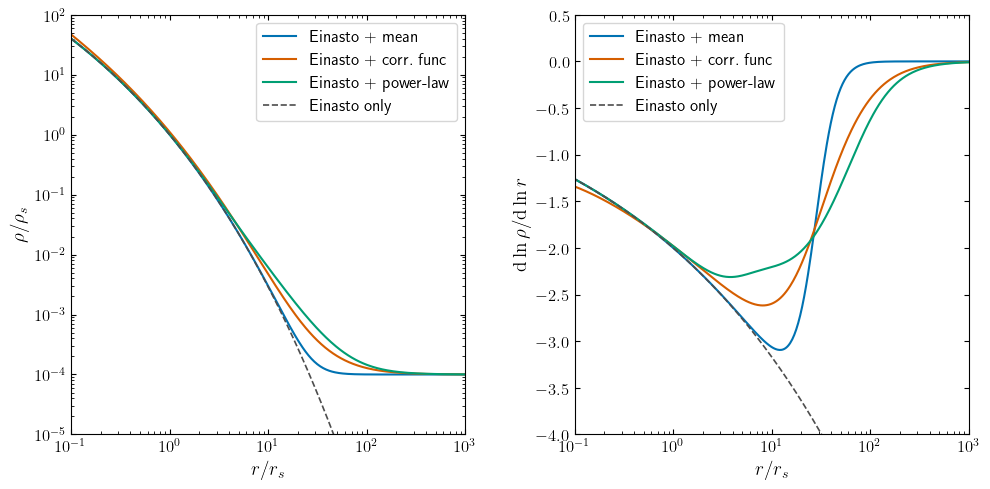

In [84]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex=False)

# --- Left: density profiles ---
ax.plot(x, rho_mean_tot,  label=r"Einasto + mean",        color="#0072B2",   lw=1.5)
ax.plot(x, rho_corr_tot,  label=r"Einasto + corr.\ func", color="#D55E00", lw=1.5)
ax.plot(x, rho_power_tot, label=r"Einasto + power-law",   color="#009E73",  lw=1.5)
ax.plot(x, rho_ein, "--", color="0.3", lw=1.2, label=r"Einasto only")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$r/r_s$")
ax.set_ylabel(r"$\rho/\rho_s$")
ax.set_xlim(1e-1, 1e3)
ax.set_ylim(1e-5, 1e2)
ax.legend(frameon=True, loc="upper right")

# --- Right: logarithmic slopes ---
ax2.plot(x, s_mean,   color="#0072B2",   lw=1.5, label=r"Einasto + mean")
ax2.plot(x, s_corr,   color="#D55E00", lw=1.5, label=r"Einasto + corr.\ func")
ax2.plot(x, s_power,  color="#009E73",  lw=1.5, label=r"Einasto + power-law")
ax2.plot(x, s_einasto, "--", color="0.3", lw=1.2, label=r"Einasto only")

ax2.set_xscale("log")
ax2.set_xlabel(r"$r/r_s$")
ax2.set_ylabel(r"$\mathrm{d}\ln\rho / \mathrm{d}\ln r$")
ax2.set_xlim(1e-1, 1e3)
ax2.set_ylim(-4, 0.5)   # adjust to taste
ax2.legend(frameon=True, loc="upper left")

plt.tight_layout(w_pad=2.5)
plt.show()

## DK14

In [88]:
def rho_dk14_inner(x, alpha=0.2, x_t=5.0, beta=6.0, gamma=14.0):
    ein = rho_einasto(x, alpha)
    f_trans = (1 + (x / x_t)**beta)**(-gamma / beta)
    return ein * f_trans


rho_dk_inner = rho_dk14_inner(x, alpha=0.2, x_t=10.0, beta=4.0, gamma=8.0)
rho_dk_inner /= rho_dk14_inner(x_ref, alpha=0.2, x_t=10.0, beta=4.0, gamma=8.0)

rho_outer = rho_mean + rho_power

In [87]:
# Total profiles

rho_einasto_outer = rho_ein + rho_outer
rho_dk14_outer    = rho_dk_inner + rho_outer

In [90]:
# Logarithimic Slopes

s_einasto_outer = log_slope(x, rho_einasto_outer)
s_dk14_outer    = log_slope(x, rho_dk14_outer)

s_einasto_inner = log_slope(x, rho_ein)
s_dk14_inner    = log_slope(x, rho_dk_inner)


### DK14 and Einasto comparison, density (Left) and Log Derivative (Right)

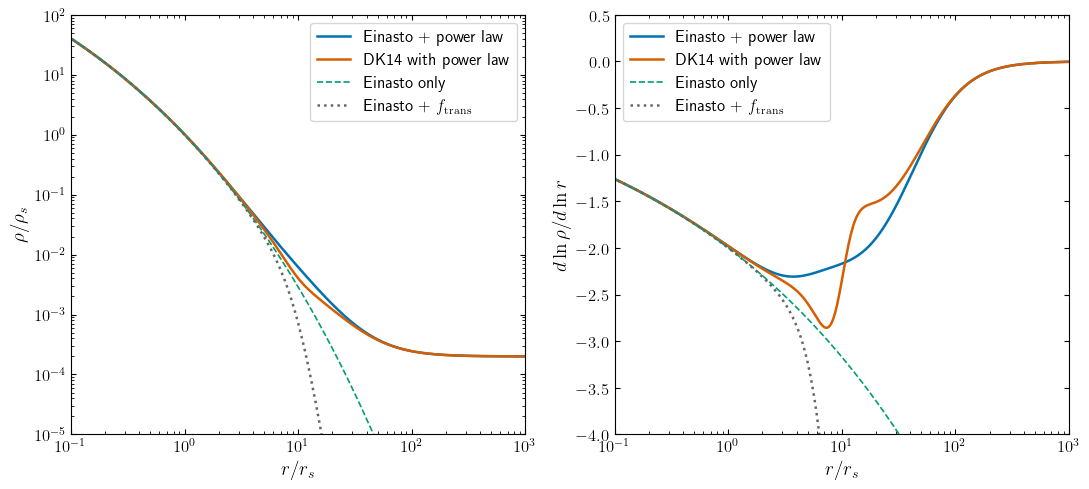

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))

# --- Left: density profiles ---
ax1.plot(x, rho_einasto_outer, label=r"Einasto + power law",
         color="#0072B2", lw=1.8)
ax1.plot(x, rho_dk14_outer, label=r"DK14 with power law",
         color="#D55E00", lw=1.8)

# Inner profiles, optional
ax1.plot(x, rho_ein, "--", color="#009E73", lw=1.2, label=r"Einasto only")
ax1.plot(x, rho_dk_inner, ":", color="#666666", lw=1.8, label=r"Einasto + $f_{\mathrm{trans}}$")

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"$r/r_s$")
ax1.set_ylabel(r"$\rho/\rho_s$")
ax1.set_xlim(1e-1, 10e2)
ax1.set_ylim(1e-5, 1e2)
ax1.legend(frameon=True, loc="upper right")

# --- Right: logarithmic slopes ---
ax2.plot(x, s_einasto_outer, color="#0072B2", lw=1.8, label=r"Einasto + power law")
ax2.plot(x, s_dk14_outer,    color="#D55E00", lw=1.8, label=r"DK14 with power law")

# Inner slopes (optional)
ax2.plot(x, s_einasto_inner, "--", color="#009E73",  lw=1.2, label=r"Einasto only")
ax2.plot(x, s_dk14_inner,    ":",  color="#666666",   lw=1.8, label=r"Einasto + $f_{\mathrm{trans}}$")

ax2.set_xscale("log")
ax2.set_xlabel(r"$r/r_s$")
ax2.set_ylabel(r"$d\ln\rho / d\ln r$")

ax2.set_xlim(1e-1, 1e3)
ax2.set_ylim(-4, 0.5)   # shows DK14 steepening very clearly
ax2.legend(frameon=True, loc="upper left")

plt.tight_layout()
plt.show()